## 1. Import Library Awal & Load Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
# Load dataset from local device
data_train = pd.read_csv("C:/Users/muham/Downloads/DAC/DAC_Elimination/DAC/Train.csv")
data_test = pd.read_csv("C:/Users/muham/Downloads/DAC/DAC_Elimination/DAC/Test.csv")

In [3]:
data_train.head()

,Unnamed: 0,time_date,site,continent_id,buyer_country,buyer_region,buyer_city,distance,buyer_id,mobile,...,children,room,destination_id,destination_type,dealing,regency_continent,regency_country,regency_market,cnt,regency_cluster
0,0,8/11/2014 7:46,2,3,66,348,48862,2234.2641,12,0,...,0,1,8250,1,0,3,2,50,628,1
1,1,8/11/2014 8:22,2,3,66,348,48862,2234.2641,12,0,...,0,1,8250,1,1,1,2,50,628,1
2,2,8/11/2014 8:24,2,3,66,348,48862,2234.2641,12,0,...,0,1,8250,1,0,1,2,50,628,1
3,3,8/9/2014 18:05,2,3,66,442,35390,913.1932,93,0,...,0,1,14984,1,0,1,2,50,1457,80
4,4,8/9/2014 18:08,2,3,66,442,35390,913.6259,93,0,...,0,1,14984,1,0,1,2,50,1457,21


In [4]:
data_test.head()

,Unnamed: 0,id,time_date,site,continent_id,buyer_country,buyer_region,buyer_city,distance,buyer_id,...,buying_date,dealing_date,adults,children,room,destination_id,destination_type,regency_continent,regency_country,regency_market
0,0,0,9/3/2015 17:09,2,3,66,174,37449,5539.0567,1,...,5/19/2016,5/23/2016,2,0,1,12243,6,6,204,27
1,1,1,9/24/2015 17:38,2,3,66,174,37449,5873.2923,1,...,5/12/2016,5/15/2016,2,0,1,14474,7,6,204,1540
2,2,2,6/7/2015 15:53,2,3,66,142,17440,3975.9776,20,...,7/26/2015,7/27/2015,4,0,1,11353,1,2,50,699
3,3,3,9/14/2015 14:49,2,3,66,258,34156,1508.5975,28,...,9/14/2015,9/16/2015,2,0,1,8250,1,2,50,628
4,4,4,7/17/2015 9:32,2,3,66,467,36345,66.7913,50,...,7/22/2015,7/23/2015,2,0,1,11812,1,2,50,538


In [5]:
# Mengecek tipe data pada DataFrame data_train
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343583 entries, 0 to 343582
Data columns (total 25 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         343583 non-null  int64  
 1   time_date          343583 non-null  object 
 2   site               343583 non-null  int64  
 3   continent_id       343583 non-null  int64  
 4   buyer_country      343583 non-null  int64  
 5   buyer_region       343583 non-null  int64  
 6   buyer_city         343583 non-null  int64  
 7   distance           145685 non-null  float64
 8   buyer_id           343583 non-null  int64  
 9   mobile             343583 non-null  int64  
 10  package            343583 non-null  int64  
 11  channel_id         343583 non-null  int64  
 12  buying_date        342885 non-null  object 
 13  dealing_date       342885 non-null  object 
 14  adults             343583 non-null  int64  
 15  children           343583 non-null  int64  
 16  ro

In [6]:
# Mengecek apakah terdapat nilai NaN pada data_train atau tidak
data_train.isnull().sum()

Unnamed: 0                0
time_date                 0
site                      0
continent_id              0
buyer_country             0
buyer_region              0
buyer_city                0
distance             197898
buyer_id                  0
mobile                    0
package                   0
channel_id                0
buying_date             698
dealing_date            698
adults                    0
children                  0
room                      0
destination_id            0
destination_type          0
dealing                   0
regency_continent         0
regency_country           0
regency_market            0
cnt                       0
regency_cluster           0
dtype: int64

In [7]:
# Mengecek tipe data pada DataFrame data_test
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21018 entries, 0 to 21017
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         21018 non-null  int64  
 1   id                 21018 non-null  int64  
 2   time_date          21018 non-null  object 
 3   site               21018 non-null  int64  
 4   continent_id       21018 non-null  int64  
 5   buyer_country      21018 non-null  int64  
 6   buyer_region       21018 non-null  int64  
 7   buyer_city         21018 non-null  int64  
 8   distance           11167 non-null  float64
 9   buyer_id           21018 non-null  int64  
 10  mobile             21018 non-null  int64  
 11  package            21018 non-null  int64  
 12  channel_id         21018 non-null  int64  
 13  buying_date        21018 non-null  object 
 14  dealing_date       21018 non-null  object 
 15  adults             21018 non-null  int64  
 16  children           210

In [8]:
# Mengecek apakah terdapat nilai NaN pada data_test atau tidak
data_test.isnull().sum()

Unnamed: 0              0
id                      0
time_date               0
site                    0
continent_id            0
buyer_country           0
buyer_region            0
buyer_city              0
distance             9851
buyer_id                0
mobile                  0
package                 0
channel_id              0
buying_date             0
dealing_date            0
adults                  0
children                0
room                    0
destination_id          0
destination_type        0
regency_continent       0
regency_country         0
regency_market          0
dtype: int64

Karena pada variabel DataFrame data_train & data_test terdapat data yang kosong/NaN. Maka dari itu kami akan mengisi data yang kosong tersebut. Selain itu pada kolom "date_time" tipe data yang dimiliki masih bersifat string/object sedangkan kami harus mengubah tipe datanya menjadi datetime.

## 2. Preprocessing + Visualisasi Data Train & Data Test

### Data Train

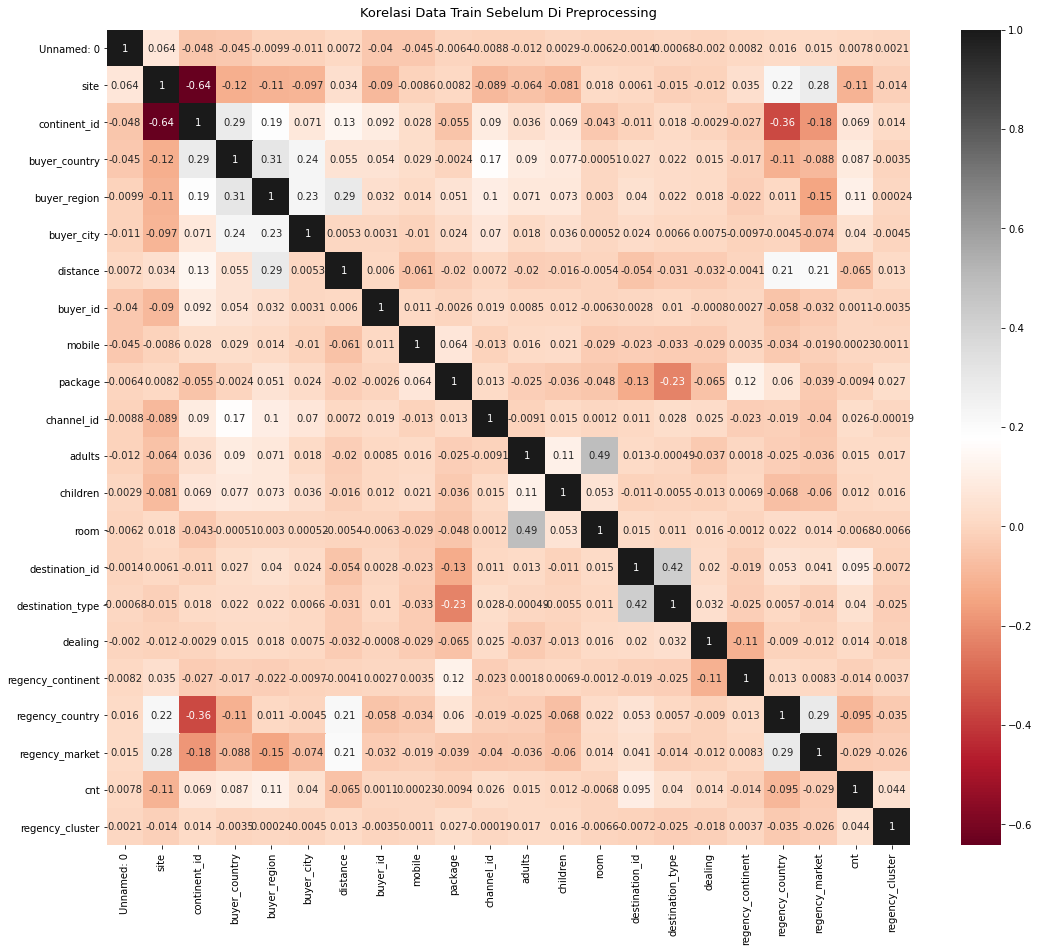

In [9]:
# Membuat sebuah korelasi untuk data train
plt.figure(figsize=(18, 15))

korelasi_data_train = sns.heatmap(data_train.corr(), cmap="RdGy", annot=True)
korelasi_data_train.set_title("Korelasi Data Train Sebelum Di Preprocessing", fontdict={"fontsize":13}, pad=13);

Karena dalam variabel DataFrame data_train masih terdapat banyak kolom yang tidak diperlukan, kami akan menghapus beberapa kolom yang ada di data_train supaya dapat mendapatkan akurasi yang jauh lebih baik.

In [10]:
# Menghapus beberapa kolom dari data_train
data_train = data_train.drop(["time_date", "continent_id", "buyer_country", "buyer_region", "buyer_city",
                              "buyer_id", "package", "buying_date", "dealing_date", "channel_id", "adults", 
                              "children", "destination_id", "destination_type"], axis = 1)
data_train.head()

,Unnamed: 0,site,distance,mobile,room,dealing,regency_continent,regency_country,regency_market,cnt,regency_cluster
0,0,2,2234.2641,0,1,0,3,2,50,628,1
1,1,2,2234.2641,0,1,1,1,2,50,628,1
2,2,2,2234.2641,0,1,0,1,2,50,628,1
3,3,2,913.1932,0,1,0,1,2,50,1457,80
4,4,2,913.6259,0,1,0,1,2,50,1457,21


In [11]:
# Mengubah tipe data pada kolom "date_time" dari yang semula string menjadi datetime
#data_train["time_date"] = pd.to_datetime(data_train["time_date"], errors="coerce")
#data_train.head()

In [12]:
# Mengubah sekaligus mengisi nilai NaN pada kolom "srch_ci" dan "srch_co"

# Preprocessing kolom "buying_date"
#data_train["buying_date"] = pd.to_datetime(data_train["buying_date"], errors="coerce")
#data_train["buying_date"].fillna(method="bfill", inplace=True)

# Preprocessing kolom "dealing_date"
#data_train["dealing_date"] = pd.to_datetime(data_train["dealing_date"], errors="coerce")
#data_train["dealing_date"].fillna(method="bfill", inplace=True)

#data_train.info()

In [13]:
# Mengisi data kosong/NaN dengan nilai mean (Rata-rata) pada kolom "distance"
mean = data_train.mean()
data_train = data_train.replace(np.nan, mean)
data_train.head()

,Unnamed: 0,site,distance,mobile,room,dealing,regency_continent,regency_country,regency_market,cnt,regency_cluster
0,0,2,2234.2641,0,1,0,3,2,50,628,1
1,1,2,2234.2641,0,1,1,1,2,50,628,1
2,2,2,2234.2641,0,1,0,1,2,50,628,1
3,3,2,913.1932,0,1,0,1,2,50,1457,80
4,4,2,913.6259,0,1,0,1,2,50,1457,21


In [14]:
# Visualisasi untuk kolom "dealing"
#plt.style.use("seaborn")

#plt.figure(figsize=(8, 5))
#sns.countplot(x="adults", hue="adults", data=data_train)
#plt.show()

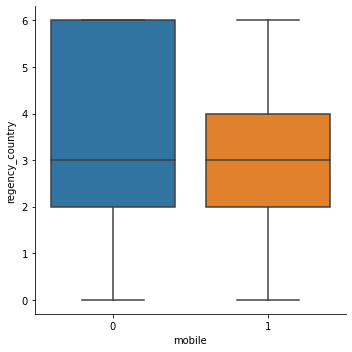

In [15]:
# Membuat visualisasi dari grafik cat plot
sns.catplot(x="mobile", y="regency_country", kind="box", data=data_train)

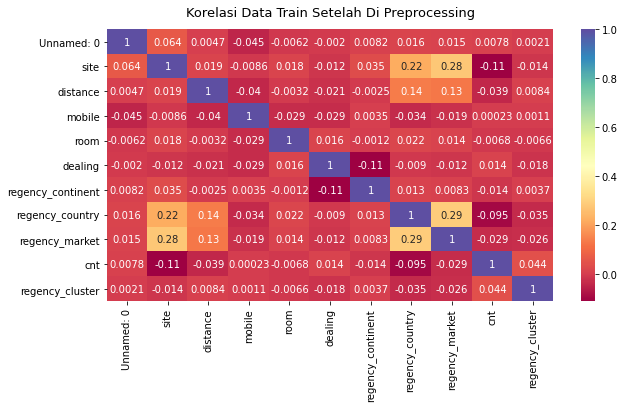

In [16]:
# Membuat sebuah korelasi untuk data train
plt.figure(figsize=(10, 5))

korelasi_data = sns.heatmap(data_train.corr(), cmap="Spectral", annot=True)
korelasi_data.set_title("Korelasi Data Train Setelah Di Preprocessing", fontdict={"fontsize":13}, pad=13);

### Data Test

In [17]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21018 entries, 0 to 21017
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         21018 non-null  int64  
 1   id                 21018 non-null  int64  
 2   time_date          21018 non-null  object 
 3   site               21018 non-null  int64  
 4   continent_id       21018 non-null  int64  
 5   buyer_country      21018 non-null  int64  
 6   buyer_region       21018 non-null  int64  
 7   buyer_city         21018 non-null  int64  
 8   distance           11167 non-null  float64
 9   buyer_id           21018 non-null  int64  
 10  mobile             21018 non-null  int64  
 11  package            21018 non-null  int64  
 12  channel_id         21018 non-null  int64  
 13  buying_date        21018 non-null  object 
 14  dealing_date       21018 non-null  object 
 15  adults             21018 non-null  int64  
 16  children           210

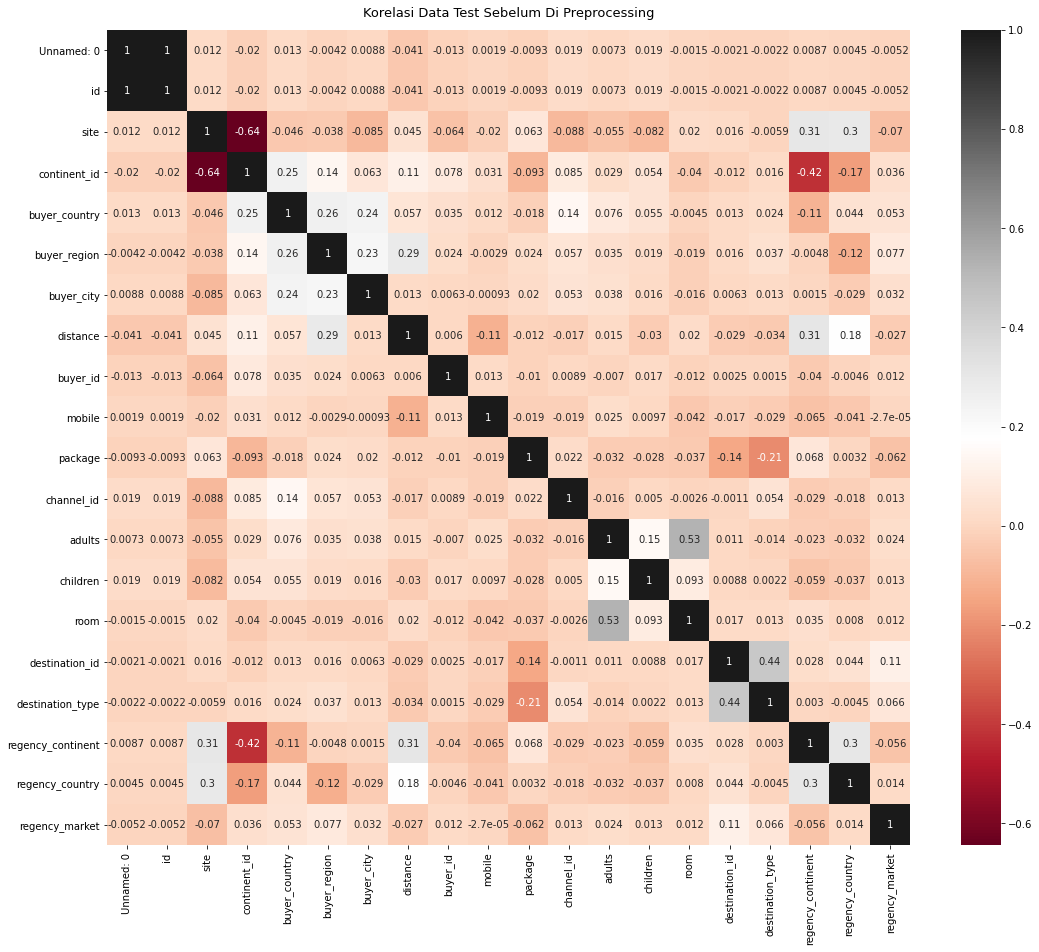

In [18]:
# Membuat sebuah korelasi untuk data train
plt.figure(figsize=(18, 15))

korelasi_data_test = sns.heatmap(data_test.corr(), cmap="RdGy", annot=True)
korelasi_data_test.set_title("Korelasi Data Test Sebelum Di Preprocessing", fontdict={"fontsize":13}, pad=13);

Sama seperti pada data train, kami akan menghapus beberapa kolom yang sekiranya tidak dibutuhkan selama proses pengujian berlangsung. Hal tersebut kami lakukan supaya mendapatkan hasil akurasi yang tinggi.

In [19]:
# Menghapus beberapa kolom dari data_test
data_test = data_test.drop(["Unnamed: 0", "time_date", "site", "continent_id", 
                            "buyer_region", "buyer_city", "mobile", "package", "buying_date", "dealing_date", 
                            "adults", "room", "destination_id", "destination_type", "regency_continent", 
                            "regency_country", "regency_market"], axis = 1)
data_test.head()

,id,buyer_country,distance,buyer_id,channel_id,children
0,0,66,5539.0567,1,3,0
1,1,66,5873.2923,1,10,0
2,2,66,3975.9776,20,1,0
3,3,66,1508.5975,28,10,0
4,4,66,66.7913,50,0,0


In [20]:
# Mengubah tipe data pada kolom "date_time", "srch_ci", dan "srch_co" dari yang semula string menjadi datetime pada 
# DataFrame data_test

# Kolom "date_time"
#data_test["time_date"] = pd.to_datetime(data_test["time_date"], errors="coerce")

# Kolom "srch_ci"
#data_test["buying_date"] = pd.to_datetime(data_test["buying_date"], errors="coerce")

# Kolom "srch_co"
#data_test["dealing_date"] = pd.to_datetime(data_test["dealing_date"], errors="coerce")

#data_test.info()

In [21]:
# Melihat data deskriptif
data_test.describe()

,id,buyer_country,distance,buyer_id,channel_id,children
count,2.101800e+04,21018.000000,11167.000000,21018.000000,21018.000000,21018.000000
mean,1.091427e+06,69.478733,1804.284095,4938.074222,6.021315,0.221334
std,7.254334e+05,59.374423,2423.374351,2854.431383,3.885809,0.635141
min,0.000000e+00,0.000000,0.030700,0.000000,0.000000,0.000000
25%,3.635832e+05,43.500000,212.266400,2482.000000,2.000000,0.000000
50%,1.084730e+06,66.000000,684.744300,4862.000000,5.000000,0.000000
75%,1.808007e+06,69.000000,2333.770300,7337.750000,10.000000,0.000000
max,2.171330e+06,239.000000,11570.060100,9999.000000,10.000000,7.000000


In [22]:
# Mengisi nilai NaN/kosong pada kolom "distance" dengan nilai rata-rata (Mean)
mean = data_test.mean()
data_test = data_test.replace(np.nan, mean)
data_test.head()

,id,buyer_country,distance,buyer_id,channel_id,children
0,0,66,5539.0567,1,3,0
1,1,66,5873.2923,1,10,0
2,2,66,3975.9776,20,1,0
3,3,66,1508.5975,28,10,0
4,4,66,66.7913,50,0,0


In [23]:
# Mengecek kembali apakah pada data_test masih terdapat nilai NaN/tidak
data_test.isnull().sum()

id               0
buyer_country    0
distance         0
buyer_id         0
channel_id       0
children         0
dtype: int64

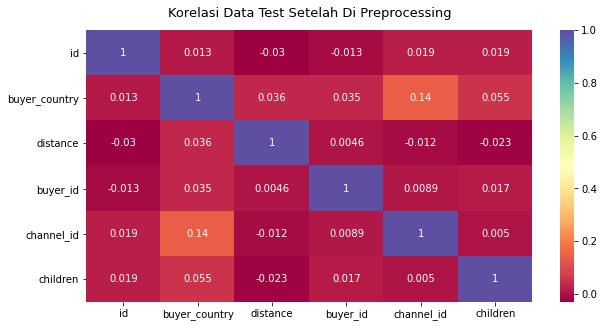

In [24]:
# Membuat sebuah korelasi untuk data train
plt.figure(figsize=(10, 5))

korelasi_data = sns.heatmap(data_test.corr(), cmap="Spectral", annot=True)
korelasi_data.set_title("Korelasi Data Test Setelah Di Preprocessing", fontdict={"fontsize":13}, pad=13);

## 3. Melakukan Pemodelan Dari Data Train

In [25]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343583 entries, 0 to 343582
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         343583 non-null  int64  
 1   site               343583 non-null  int64  
 2   distance           343583 non-null  float64
 3   mobile             343583 non-null  int64  
 4   room               343583 non-null  int64  
 5   dealing            343583 non-null  int64  
 6   regency_continent  343583 non-null  int64  
 7   regency_country    343583 non-null  int64  
 8   regency_market     343583 non-null  int64  
 9   cnt                343583 non-null  int64  
 10  regency_cluster    343583 non-null  int64  
dtypes: float64(1), int64(10)
memory usage: 28.8 MB


In [26]:
# Pemisahan data menjadi 2 variable

x = data_train.drop(["regency_cluster"], axis=1)

y = data_train["regency_cluster"]

In [27]:
# Melakukan pembagian data menjadi 2 bagian 
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [28]:

# Melakukan proses standarisasi
#from sklearn.preprocessing import StandardScaler

#sc = StandardScaler()
#x_train = sc.fit_transform(x_train)
#x_test = sc.fit_transform(x_test)


In [29]:
# Pemanggilan model SVM terhadap variabel training
from sklearn.tree import DecisionTreeClassifier

modeldt = DecisionTreeClassifier()
modeldt.fit(x_test, y_test)

DecisionTreeClassifier()

In [30]:
# Melakukan pengujian untuk variabel test dan variabel train
print("------------Prediksi dari variabel test------------------")
y_pred_test = modeldt.predict(x_test)
print(y_pred_test)

print("------------Prediksi dari variabel train-----------------")
y_pred_train = modeldt.predict(x_train)
print(y_pred_train)

------------Prediksi dari variabel test------------------
[10 44 72 ... 31 41 40]
------------Prediksi dari variabel train-----------------
[56 93 61 ... 96 64 55]


In [31]:
# Pengukuran performa untuk variabel test dan train
from sklearn.metrics import confusion_matrix

print("------------------Performa Variabel Test------------------------")
print(confusion_matrix(y_test, y_pred_test))

print("------------------Performa Variabel Train------------------------")
print(confusion_matrix(y_train, y_pred_train))

------------------Performa Variabel Test------------------------
[[ 922    0    0 ...    0    0    0]
 [   0  897    0 ...    0    0    0]
 [   0    0 1403 ...    0    0    0]
 ...
 [   0    0    1 ... 1370    0    0]
 [   2    0    2 ...    2 1408    0]
 [   0    1    1 ...    3    1 1569]]
------------------Performa Variabel Train------------------------
[[ 650    3    0 ...   21   23    1]
 [   0 1048    0 ...    0    0    0]
 [   0    0  751 ...   44   47   68]
 ...
 [  29    0   51 ...  749  102   38]
 [  37    0   69 ...   98  818   24]
 [   6    2   78 ...   37   29  829]]


In [32]:
# Menampilkan tingkat akurasi, precision, recall & f1-score dari model Naive Bayes
from sklearn.metrics import classification_report

print("-----------------------Variabel Test-------------------------------")
print(classification_report(y_test, y_pred_test))

print("-----------------------Variabel Train------------------------------")
print(classification_report(y_train, y_pred_train))

-----------------------Variabel Test-------------------------------
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       923
           1       0.98      1.00      0.99       897
           2       0.96      1.00      0.98      1403
           3       0.95      1.00      0.97       846
           4       0.97      1.00      0.98       836
           5       0.95      1.00      0.97      2004
           6       0.95      1.00      0.97      1081
           7       0.98      1.00      0.99       577
           8       0.95      0.99      0.97       948
           9       0.97      0.99      0.98      1363
          10       0.96      1.00      0.98      1136
          11       0.94      0.99      0.97      1184
          12       0.93      1.00      0.97      1369
          13       0.98      0.99      0.99       736
          14       0.96      0.99      0.97       603
          15       0.95      0.99      0.97      1070
          16 

In [45]:
data_test.to_csv(r'output2.csv')

In [55]:
output3 = pd.DataFrame({'id' : data_test["id"], 'regency_cluster' : data_train["regency_cluster"]})
output3

,id,regency_cluster
0,0.0,1
1,1.0,1
2,2.0,1
3,3.0,80
4,4.0,21
...,...,...
343578,NaN,94
343579,NaN,70
343580,NaN,18
343581,NaN,91


In [57]:
output3.to_csv(".output3.csv", index=False)

In [58]:
output3 = pd.read_csv(".output3.csv")